**<center><font size = "5">Visually Explore Distributions<center>**
<center><font size = "4">Learn Multiple Techniques to Visually Explore and Compare Distributions of Data<center>
    
***
<center><font size = "2">Prepared by: Kurt Klingensmith<center>

### In class exercise:

After reading about the different data visualization techniques such as Histograms, KDE Plots, Joy Plots, Box Plots, Violin Plots, Strip and Swarm Plots, and ECDF Plots, compare and contrast two of these methods. Focus on their suitability for different types of data and what insights they might provide that others do not. Use examples from the synthetic weather data provided in the article to support your comparison.

# Notebook Setup

## Load Libraries:

In [1]:
# Data Handling:
import pandas as pd
from pandas.api.types import CategoricalDtype

# Data Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from joypy import joyplot

# Display Configuration:
%config InlineBackend.figure_format='retina'

## Load in Data:

In [2]:
# Load data:
df = pd.read_csv('weatherData.csv')

# Set season as a categorical data type:
season = CategoricalDtype(['Winter', 'Spring', 'Summer', 'Fall'])
df['Season'] = df['Season'].astype(season)

df.head(5)

,Location,Season,Entry,Temp
0,City A,Spring,1,35.0
1,City B,Spring,1,35.0
2,City C,Spring,1,69.0
3,City A,Summer,1,78.0
4,City B,Summer,1,74.0


In [3]:
df.shape

(1200, 4)

# Distribution Vizualizations:

## The Histogram

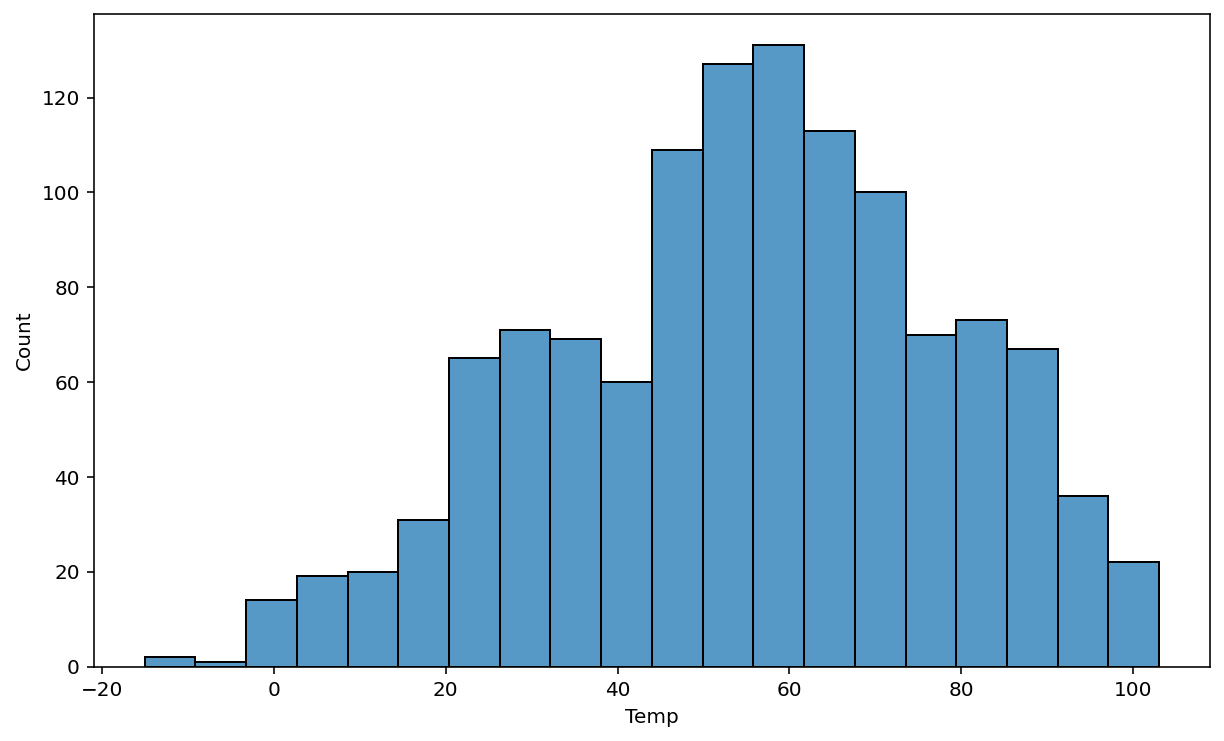

In [4]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Generate histogram:
sns.histplot(df, x='Temp');

## KDE Plots

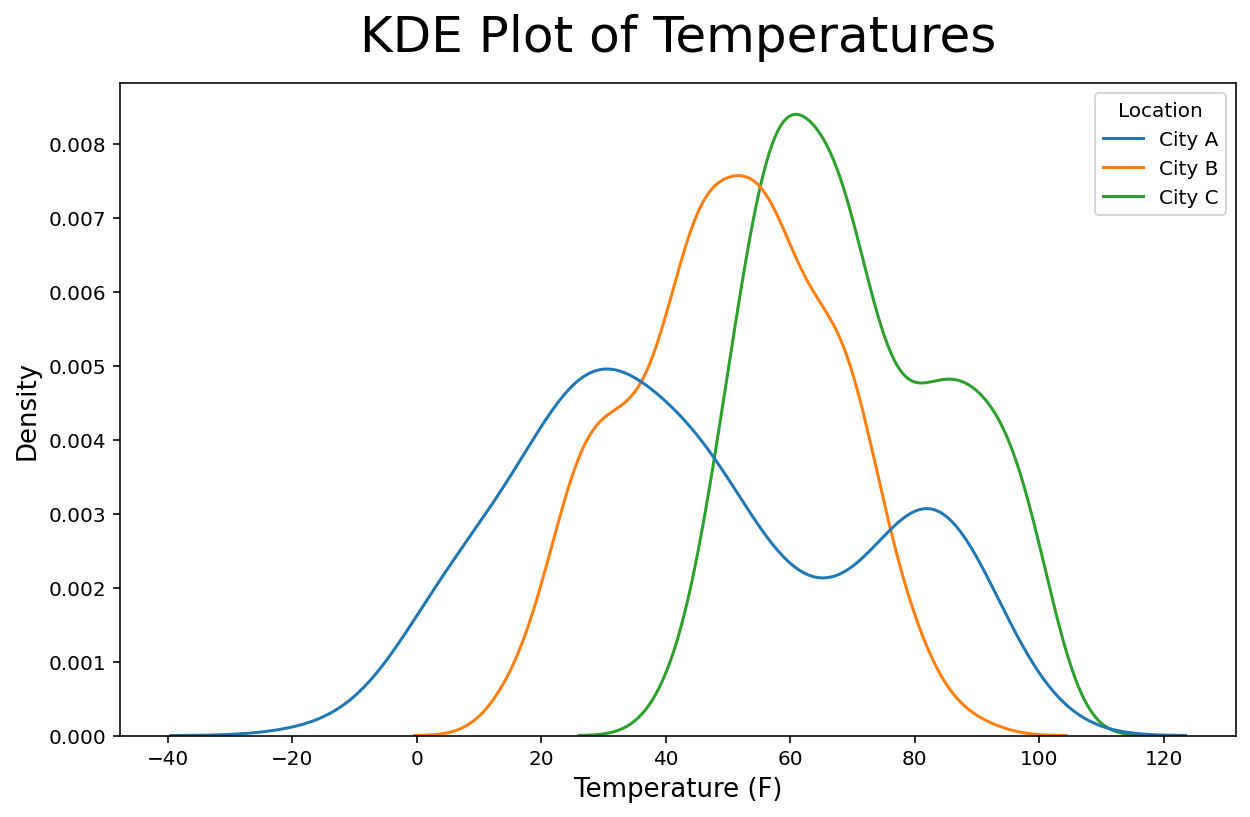

In [9]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Generate KDE plot:
sns.kdeplot(data=df, x='Temp', hue='Location', fill=False)

# Set labels:
plt.title('KDE Plot of Temperatures', fontsize=25, y=1.03)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('Density', fontsize=13);

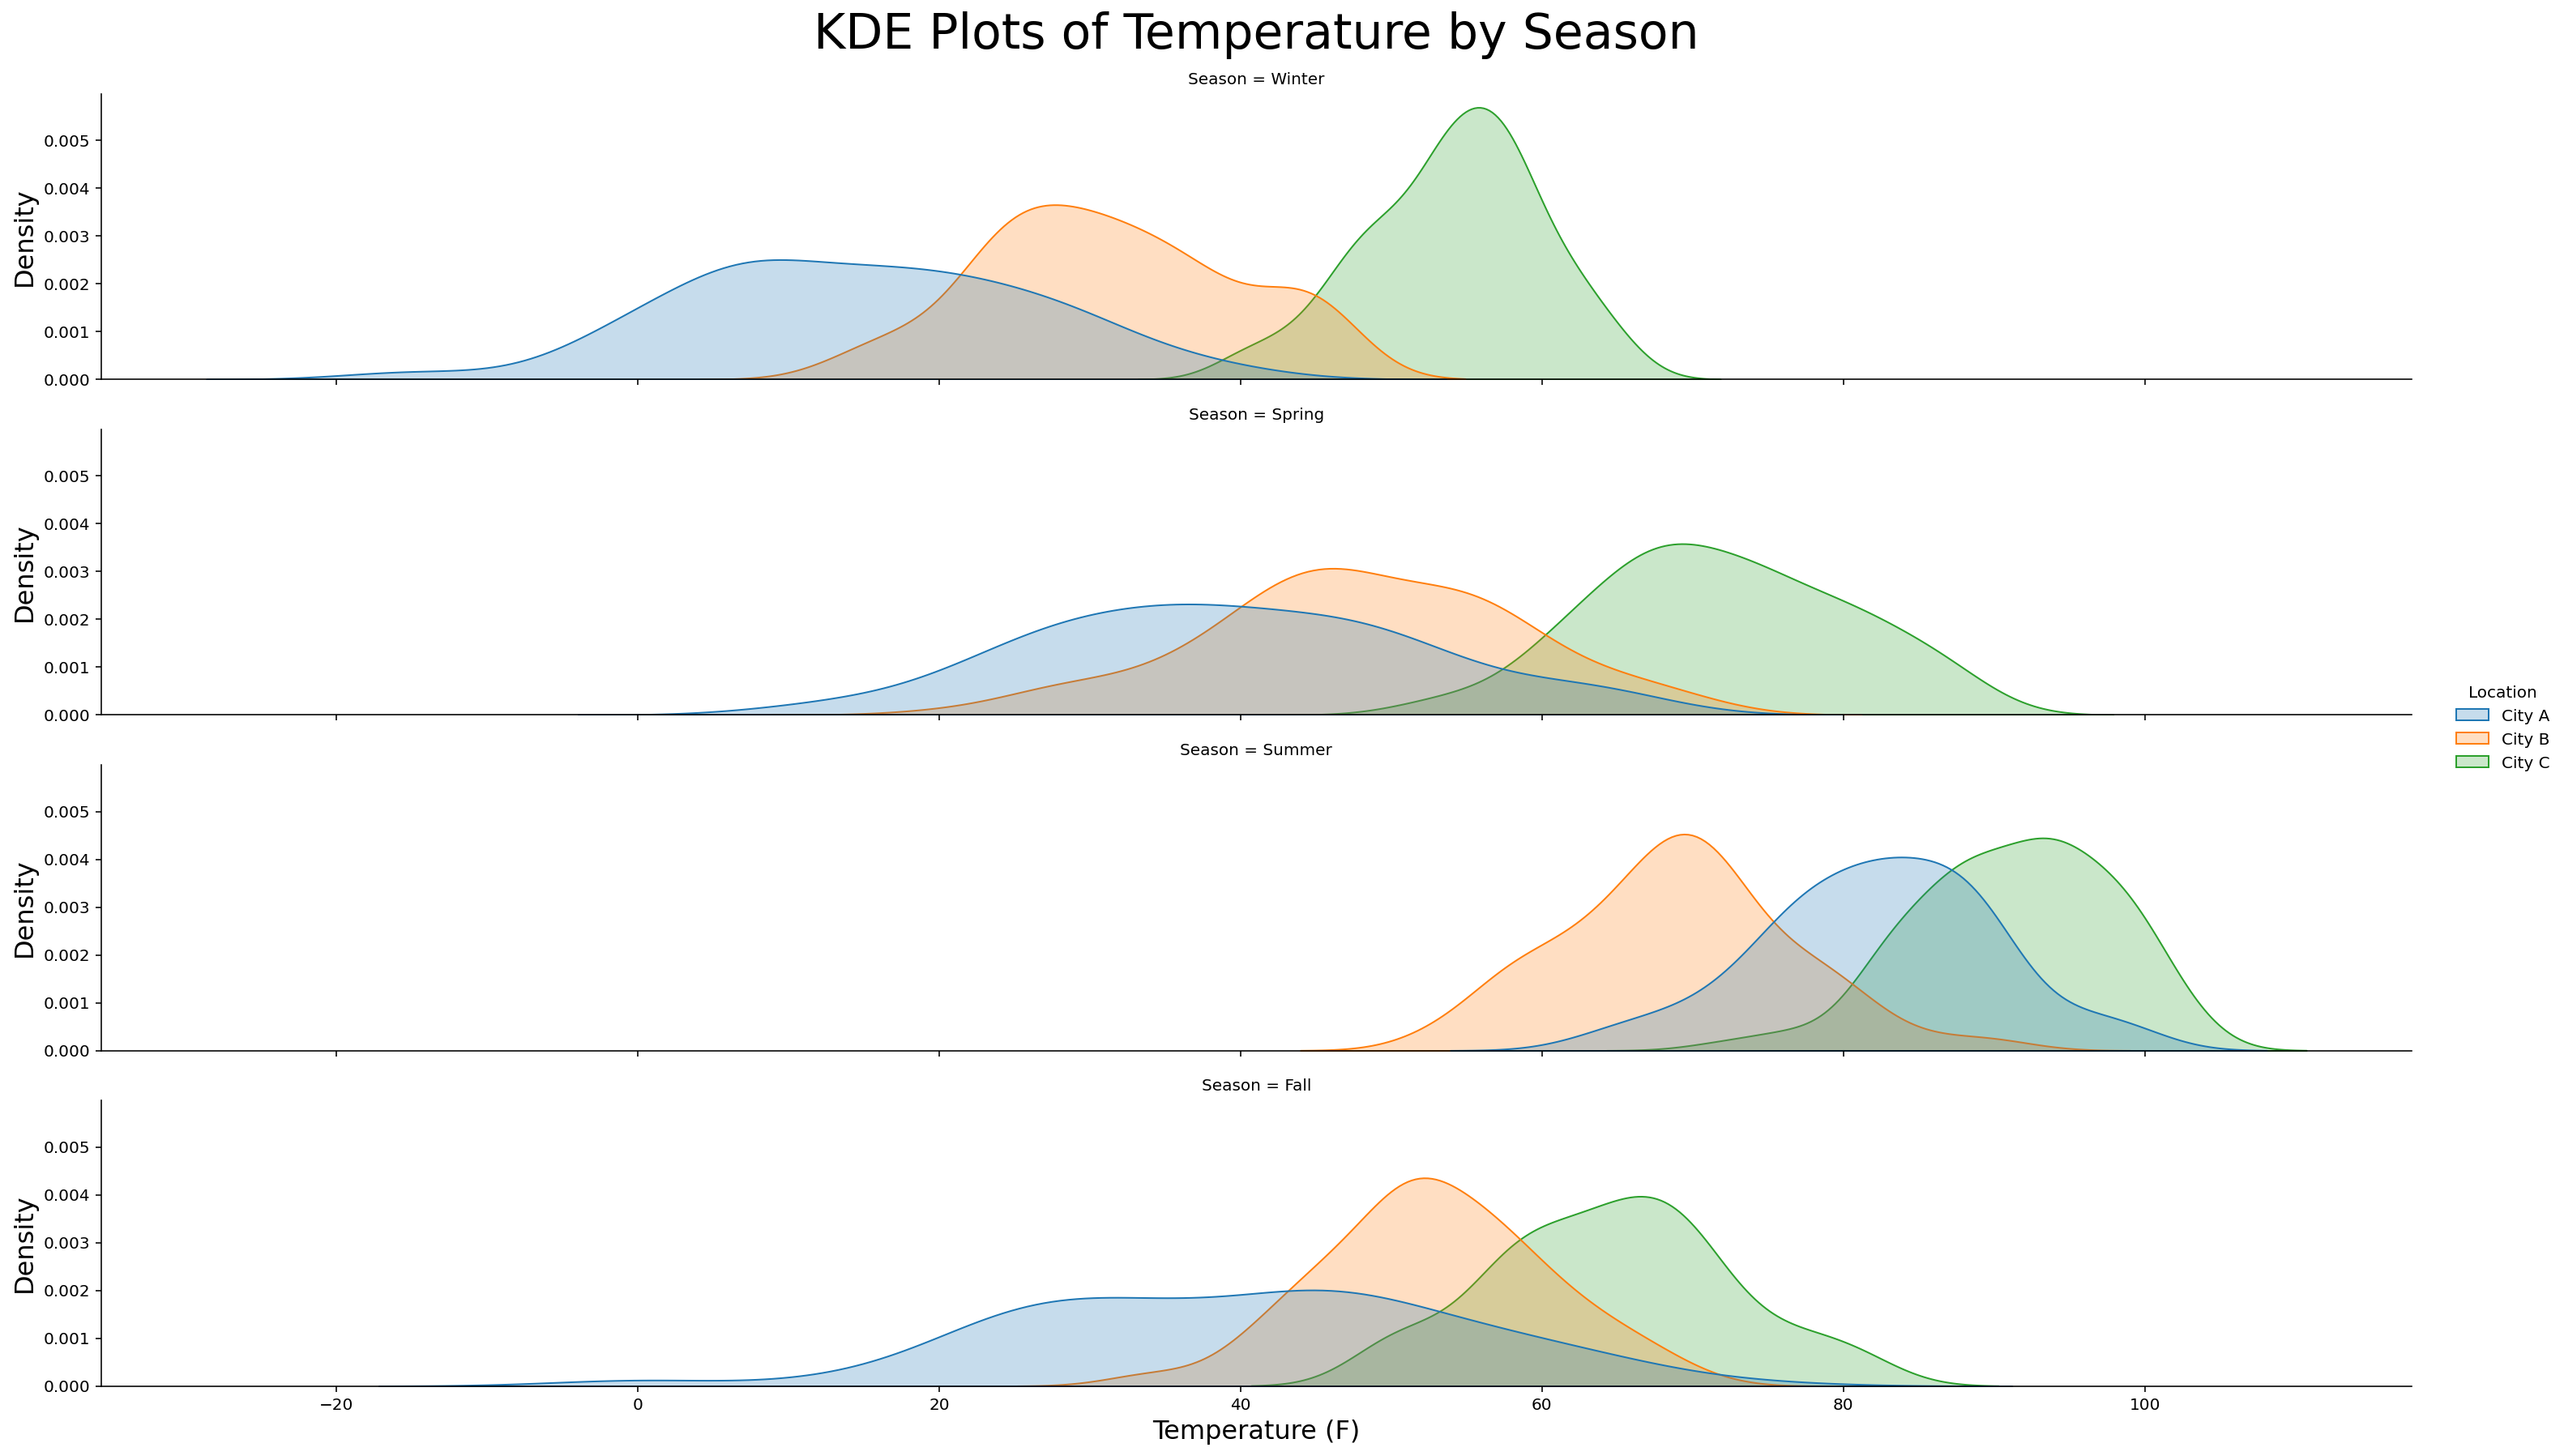

In [10]:
# Create Displot:
g = sns.displot(df, x="Temp", col="Season", hue='Location',
                kind='kde', height=3, aspect=7, col_wrap=1,
                fill=True, facet_kws=dict(margin_titles=True))

# Set title:
g.fig.suptitle('KDE Plots of Temperature by Season',
               fontsize=30, x=0.49, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Density', fontsize=16);

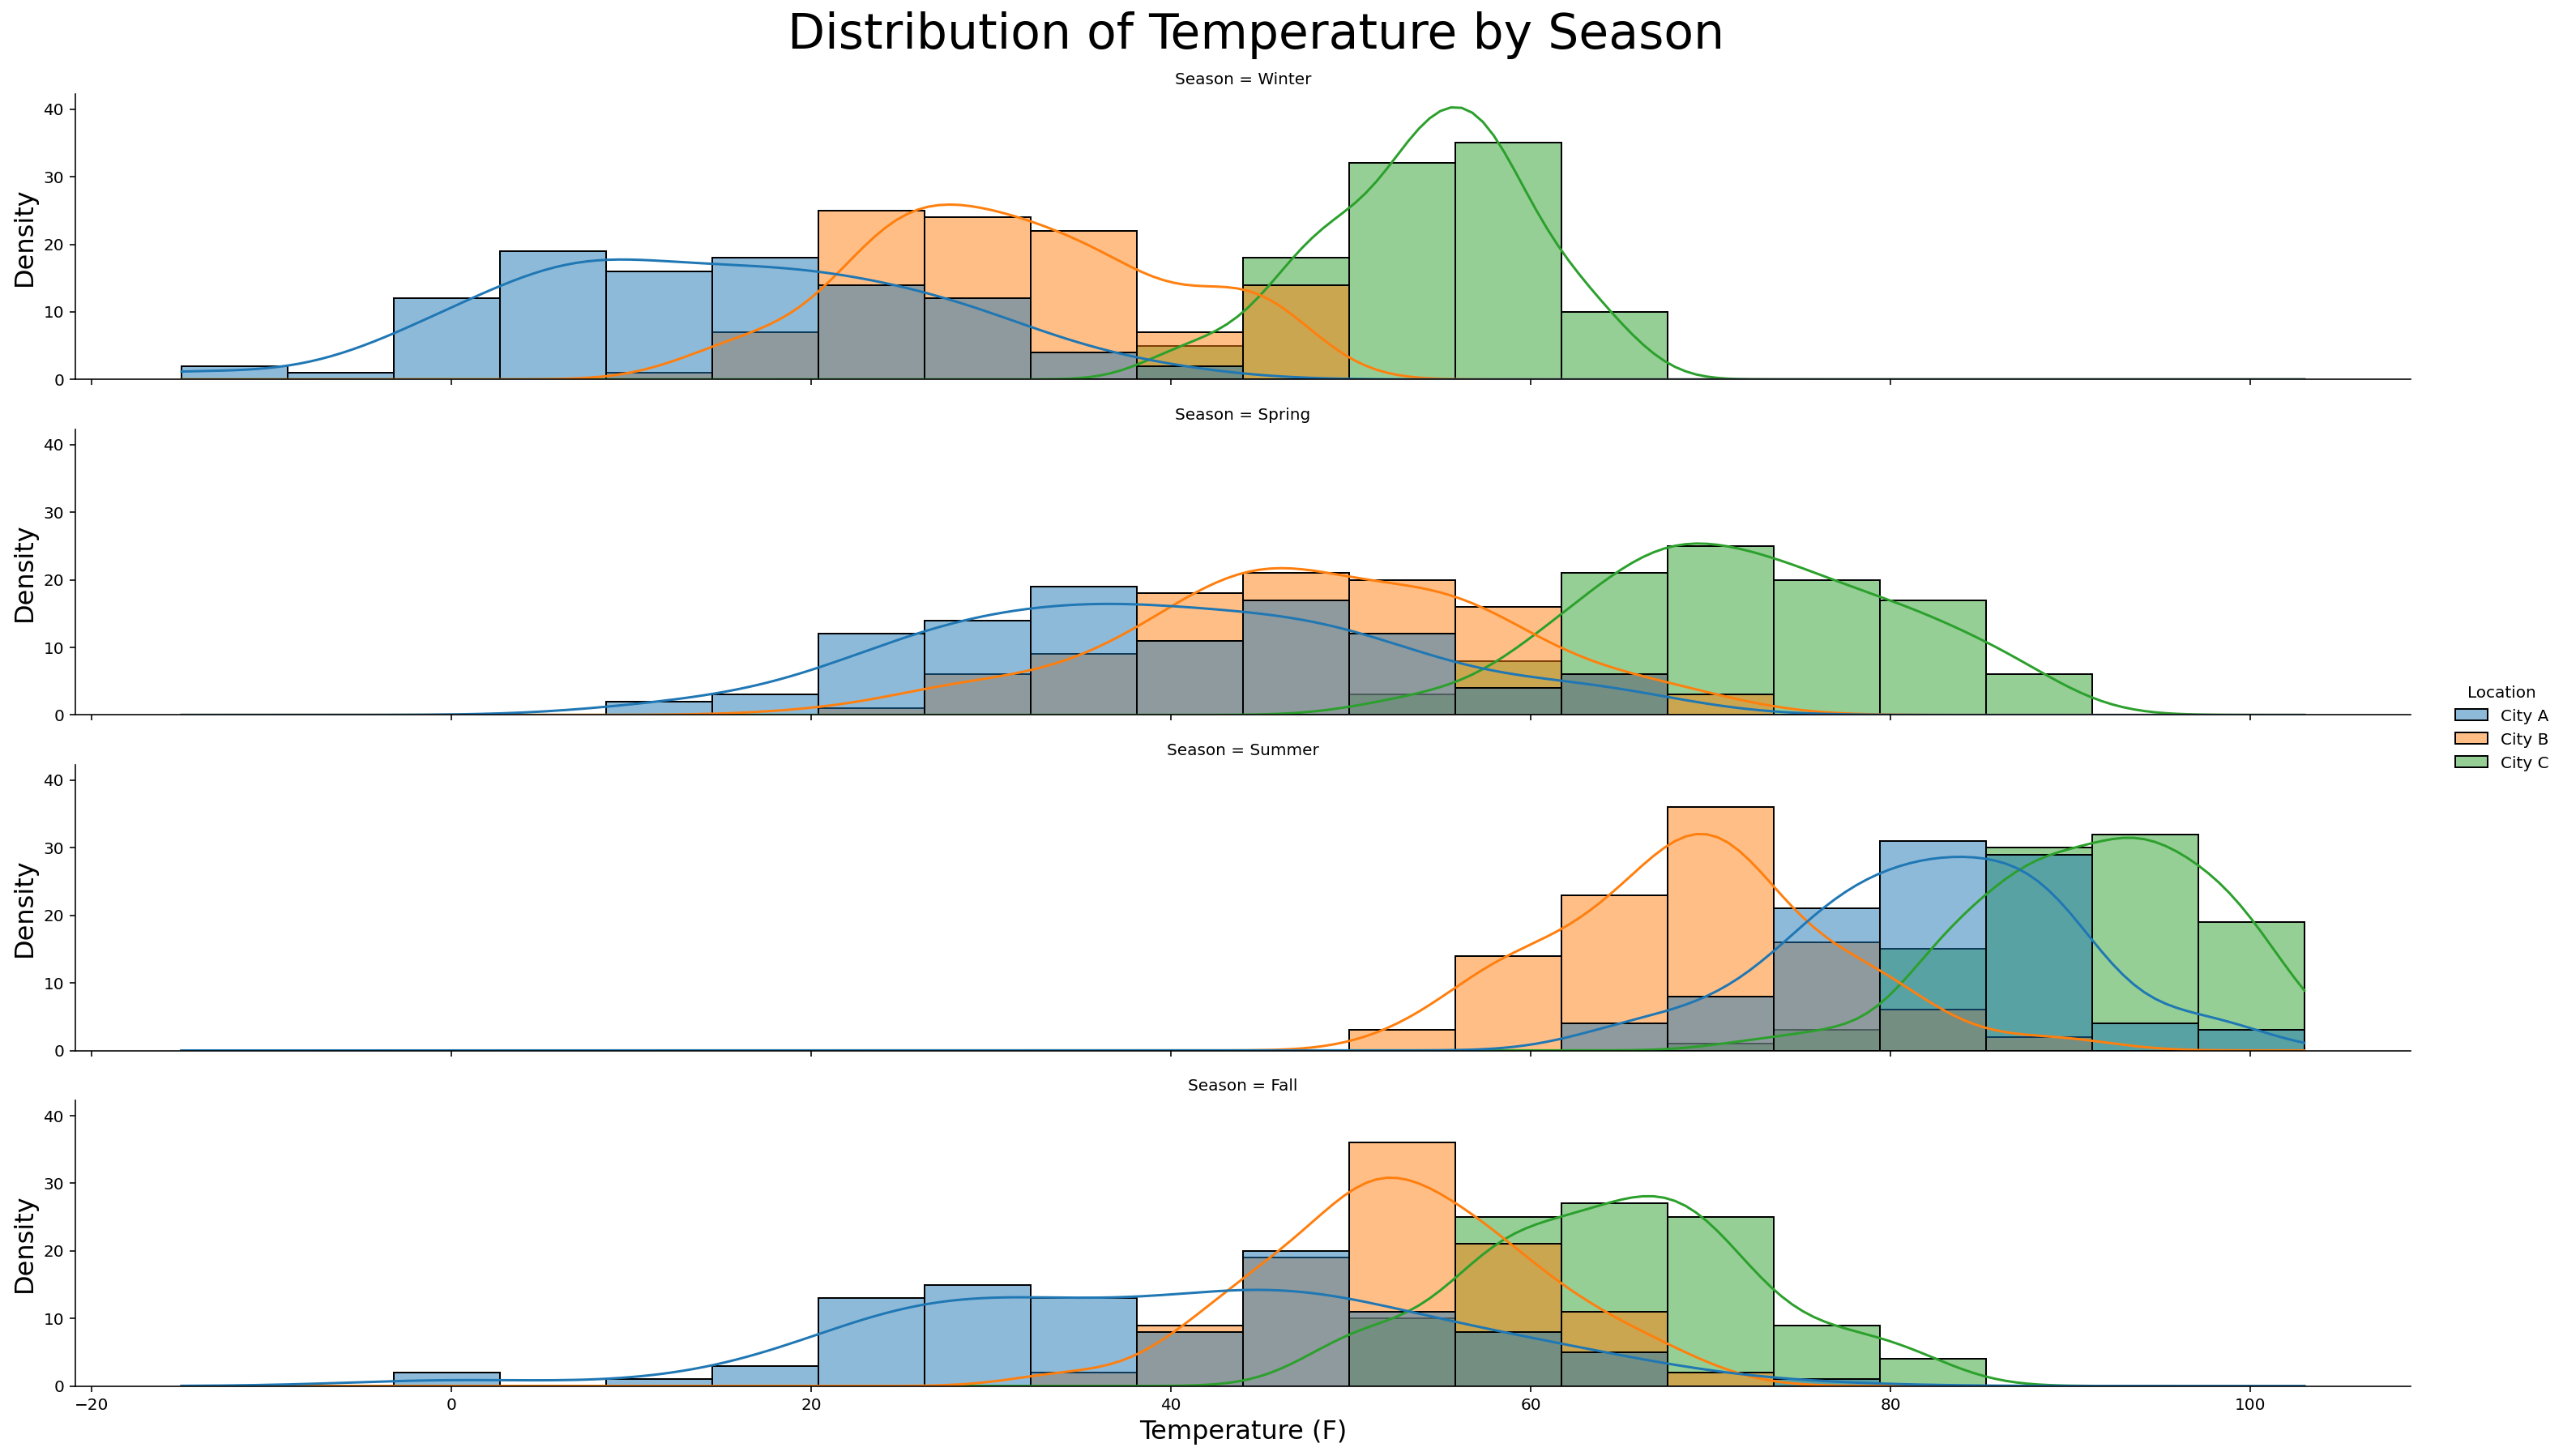

In [11]:
# Create Displot:
g = sns.displot(df, x="Temp", col="Season", hue='Location', 
                kde=True, height=3, aspect=7, col_wrap=1, 
                fill=True, facet_kws=dict(margin_titles=True));

# Set title:
g.fig.suptitle('Distribution of Temperature by Season', fontsize=30, x=0.49, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Density', fontsize=16);

## Joy Plots / Ridge Plots

In [12]:
# Structure the data:
dfJoy = df.pivot(index=['Entry', 'Season'], columns='Location', values='Temp')

dfJoy.head()

Location      City A  City B  City C
Entry Season                        
1     Winter    16.0    45.0    54.0
      Spring    35.0    35.0    69.0
      Summer    78.0    74.0    72.0
      Fall      46.0    66.0    63.0
2     Winter    29.0    36.0    46.0

In [13]:
dfJoy.shape

(400, 3)

Text(0.5, 33.0, 'Temperature (F)')

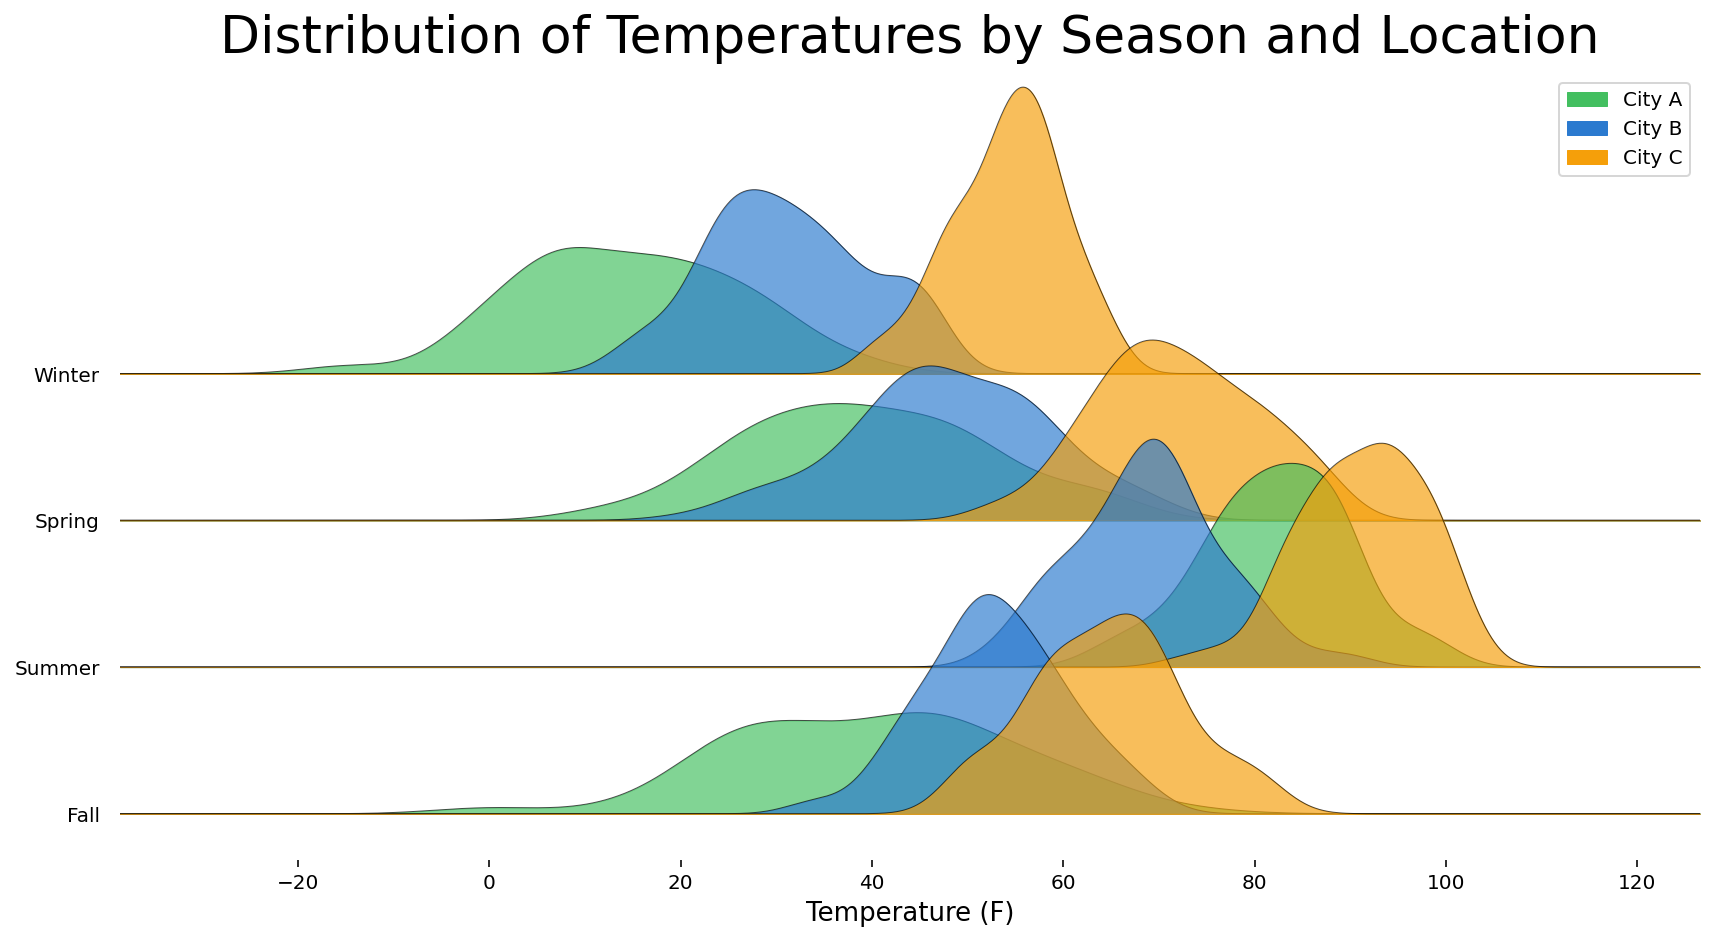

In [14]:
# Create JoyPlot / RidgePlot:
fig, axes = joyplot(data=dfJoy,
                    by='Season',
                    column=['City A', 'City B', 'City C'],
                    color=['#43bf60', '#2b7acf', '#f59f0a'],
                    alpha=.67,
                    legend=True,
                    overlap=2,
                    linewidth=.5,
                    figsize=(12, 6))

# Set Labels
plt.title('Distribution of Temperatures by Season and Location',
          fontsize=26, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)

## Box Plots

In [15]:
# Generate plot:
plot = px.box(df, x='Season', color='Location', y='Temp', 
              color_discrete_sequence=px.colors.cyclical.IceFire)

# Update layout and titles:
plot.update_layout(title={'text': "Seasonal Temperature Distributions\
                                  <br><sup>By Season for Cities A, B, \
                                  and C</sup>",
                          'xanchor': 'left',
                          'yanchor': 'top',
                          'x': 0.1}, legend_title_text='Location:',
                   xaxis_title='',
                   yaxis_title='Temperature (F)')

# Update style:
plot.update_layout(plot_bgcolor = 'white')
plot.update_xaxes(showline=True, linecolor='gray')
plot.update_yaxes(showline=True, linecolor='gray')

plot.show()

## Violin Plots

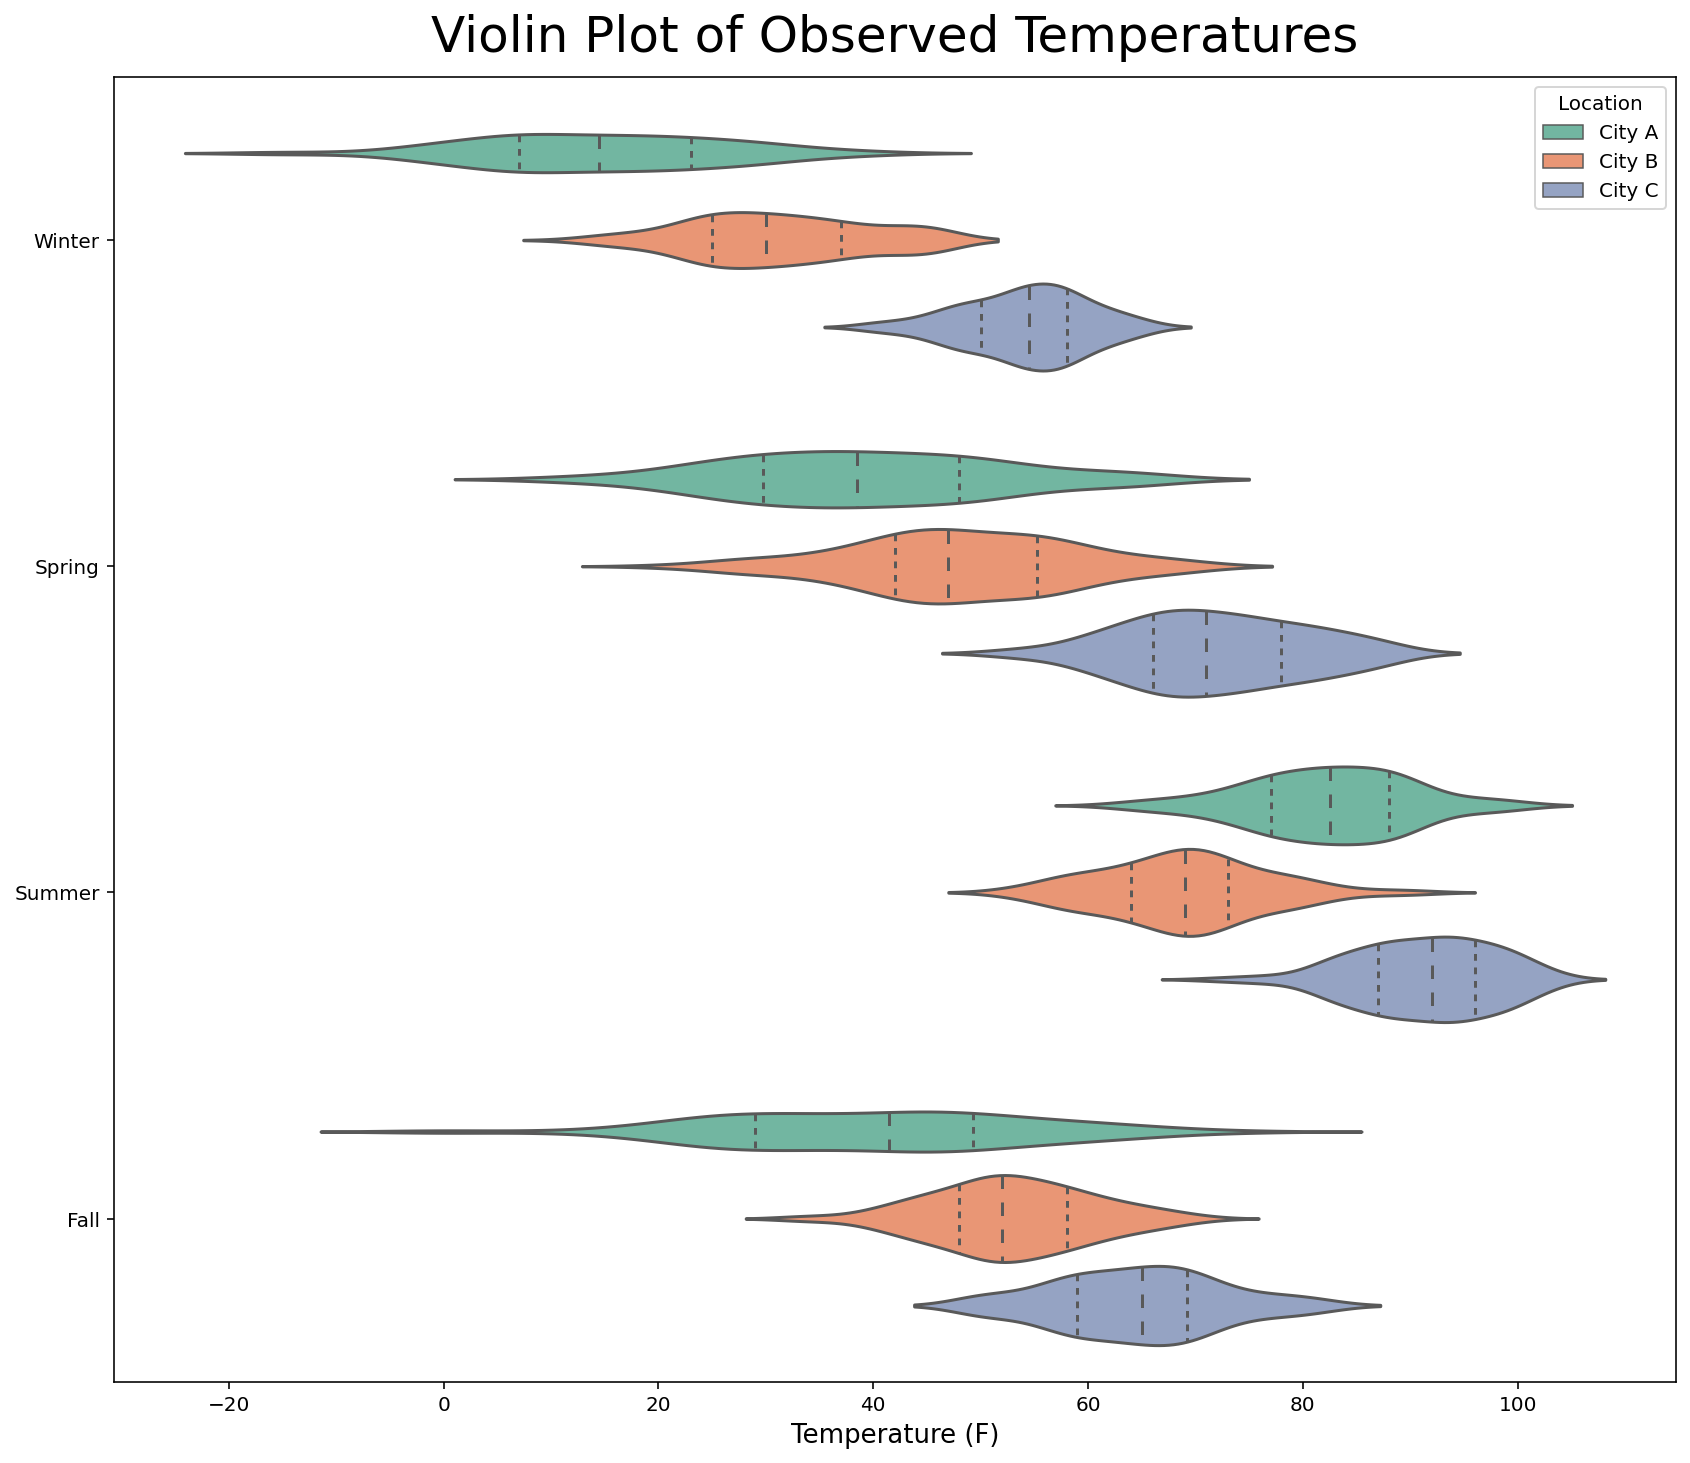

In [16]:
# Set plot size:
plt.figure(figsize=(14, 12))

# Generate violin plot:
sns.violinplot(data=df, x='Temp', y='Season', hue='Location',
               inner='quartile', palette='Set2')

# Set labels:
plt.title('Violin Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

## Strip and Swarm Plots

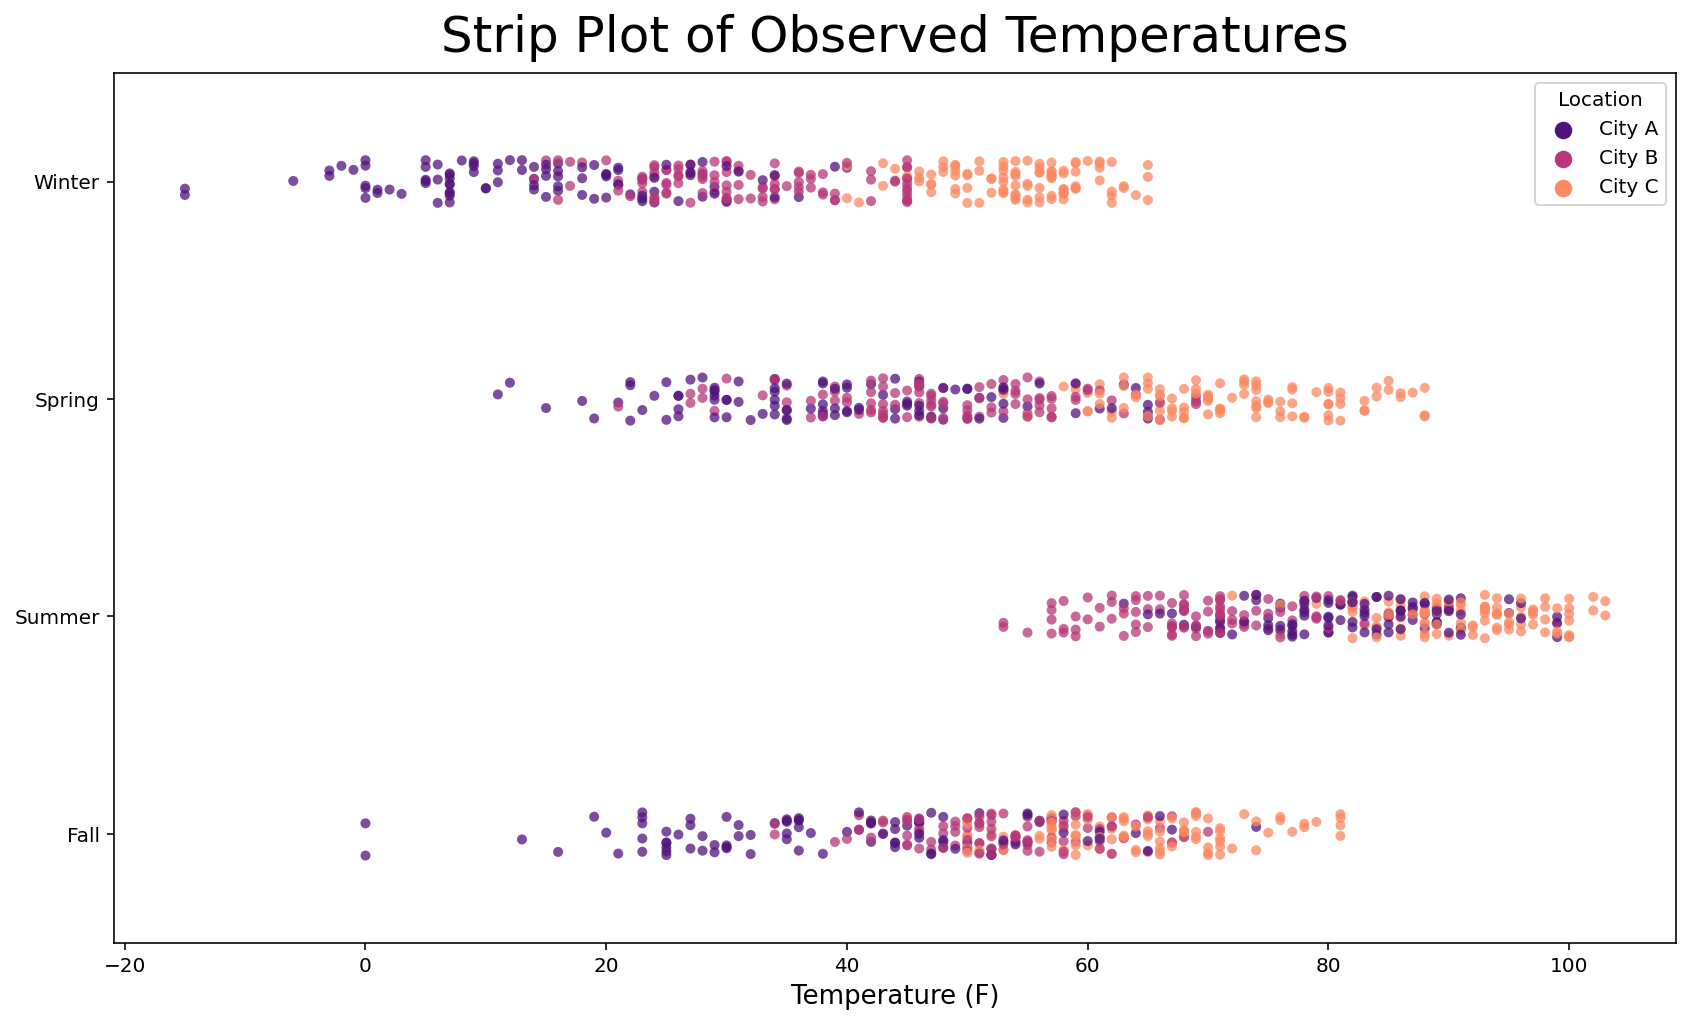

In [17]:
# Set plot size:
plt.figure(figsize=(14, 8))

# Generate strip plot:
sns.stripplot(data=df, x='Temp', y='Season', hue='Location', jitter=True, 
              palette="magma", alpha=.75)

# Set labels:
plt.title('Strip Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

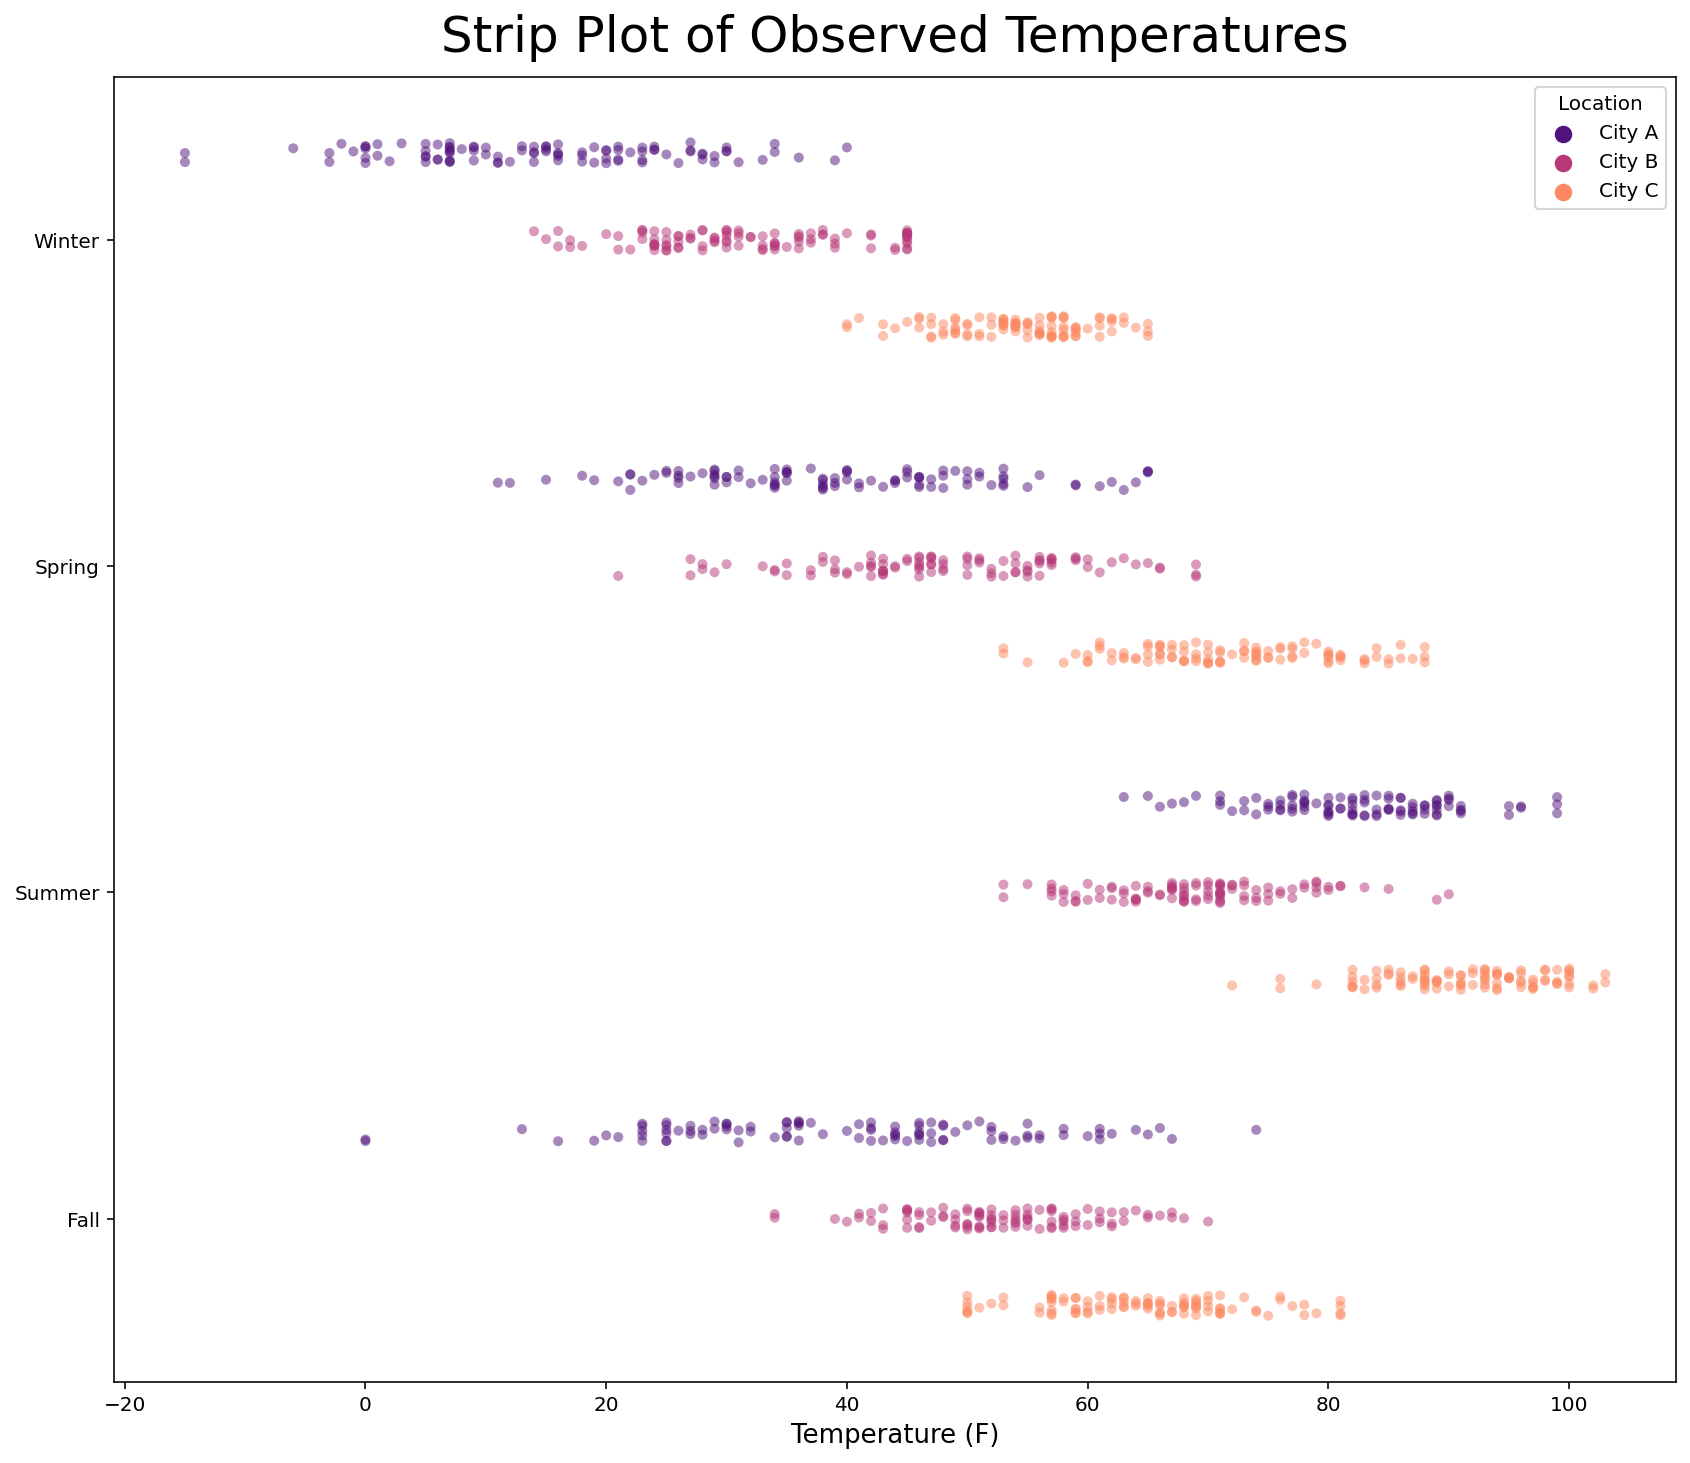

In [18]:
# Set plot size:
plt.figure(figsize=(14, 12))

# Generate strip plot:
sns.stripplot(data=df, x='Temp', y='Season', hue='Location', jitter=True, 
              palette="magma", dodge=True, alpha=.5)

# Set labels:
plt.title('Strip Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

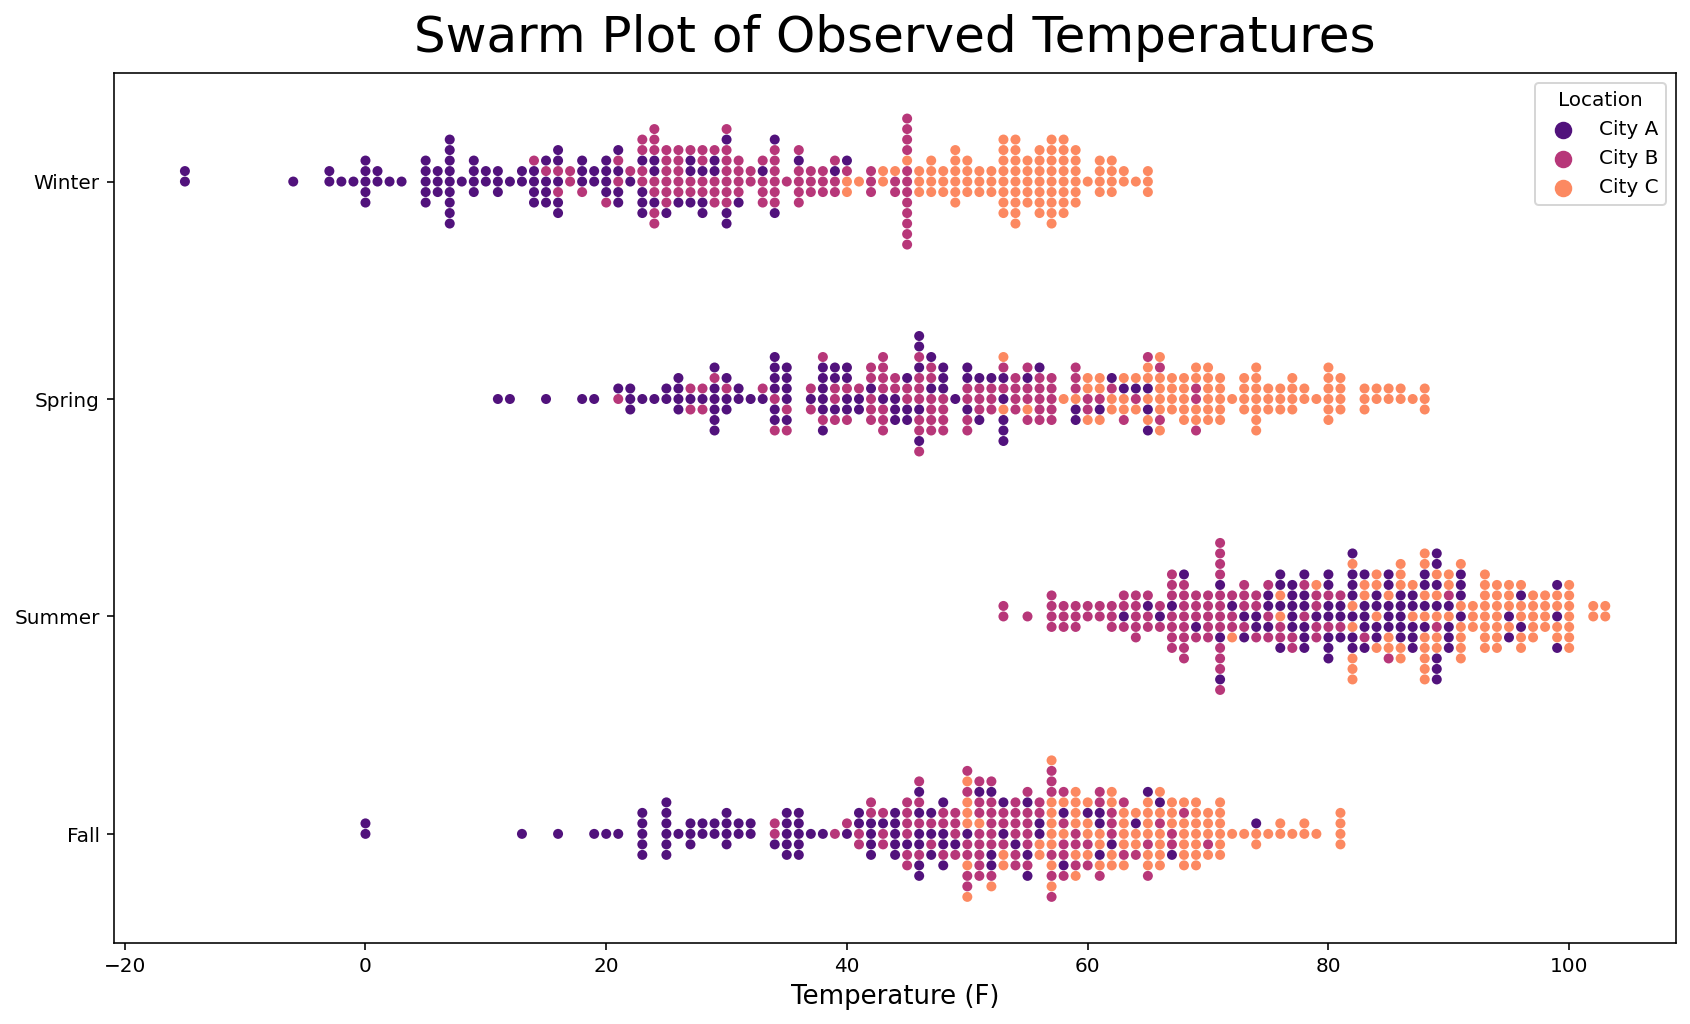

In [19]:
# Set plot size:
plt.figure(figsize=(14, 8))

# Generate swarm plot:
sns.swarmplot(data=df, x='Temp', y='Season', hue='Location', 
              palette='magma')

# Set labels:
plt.title('Swarm Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

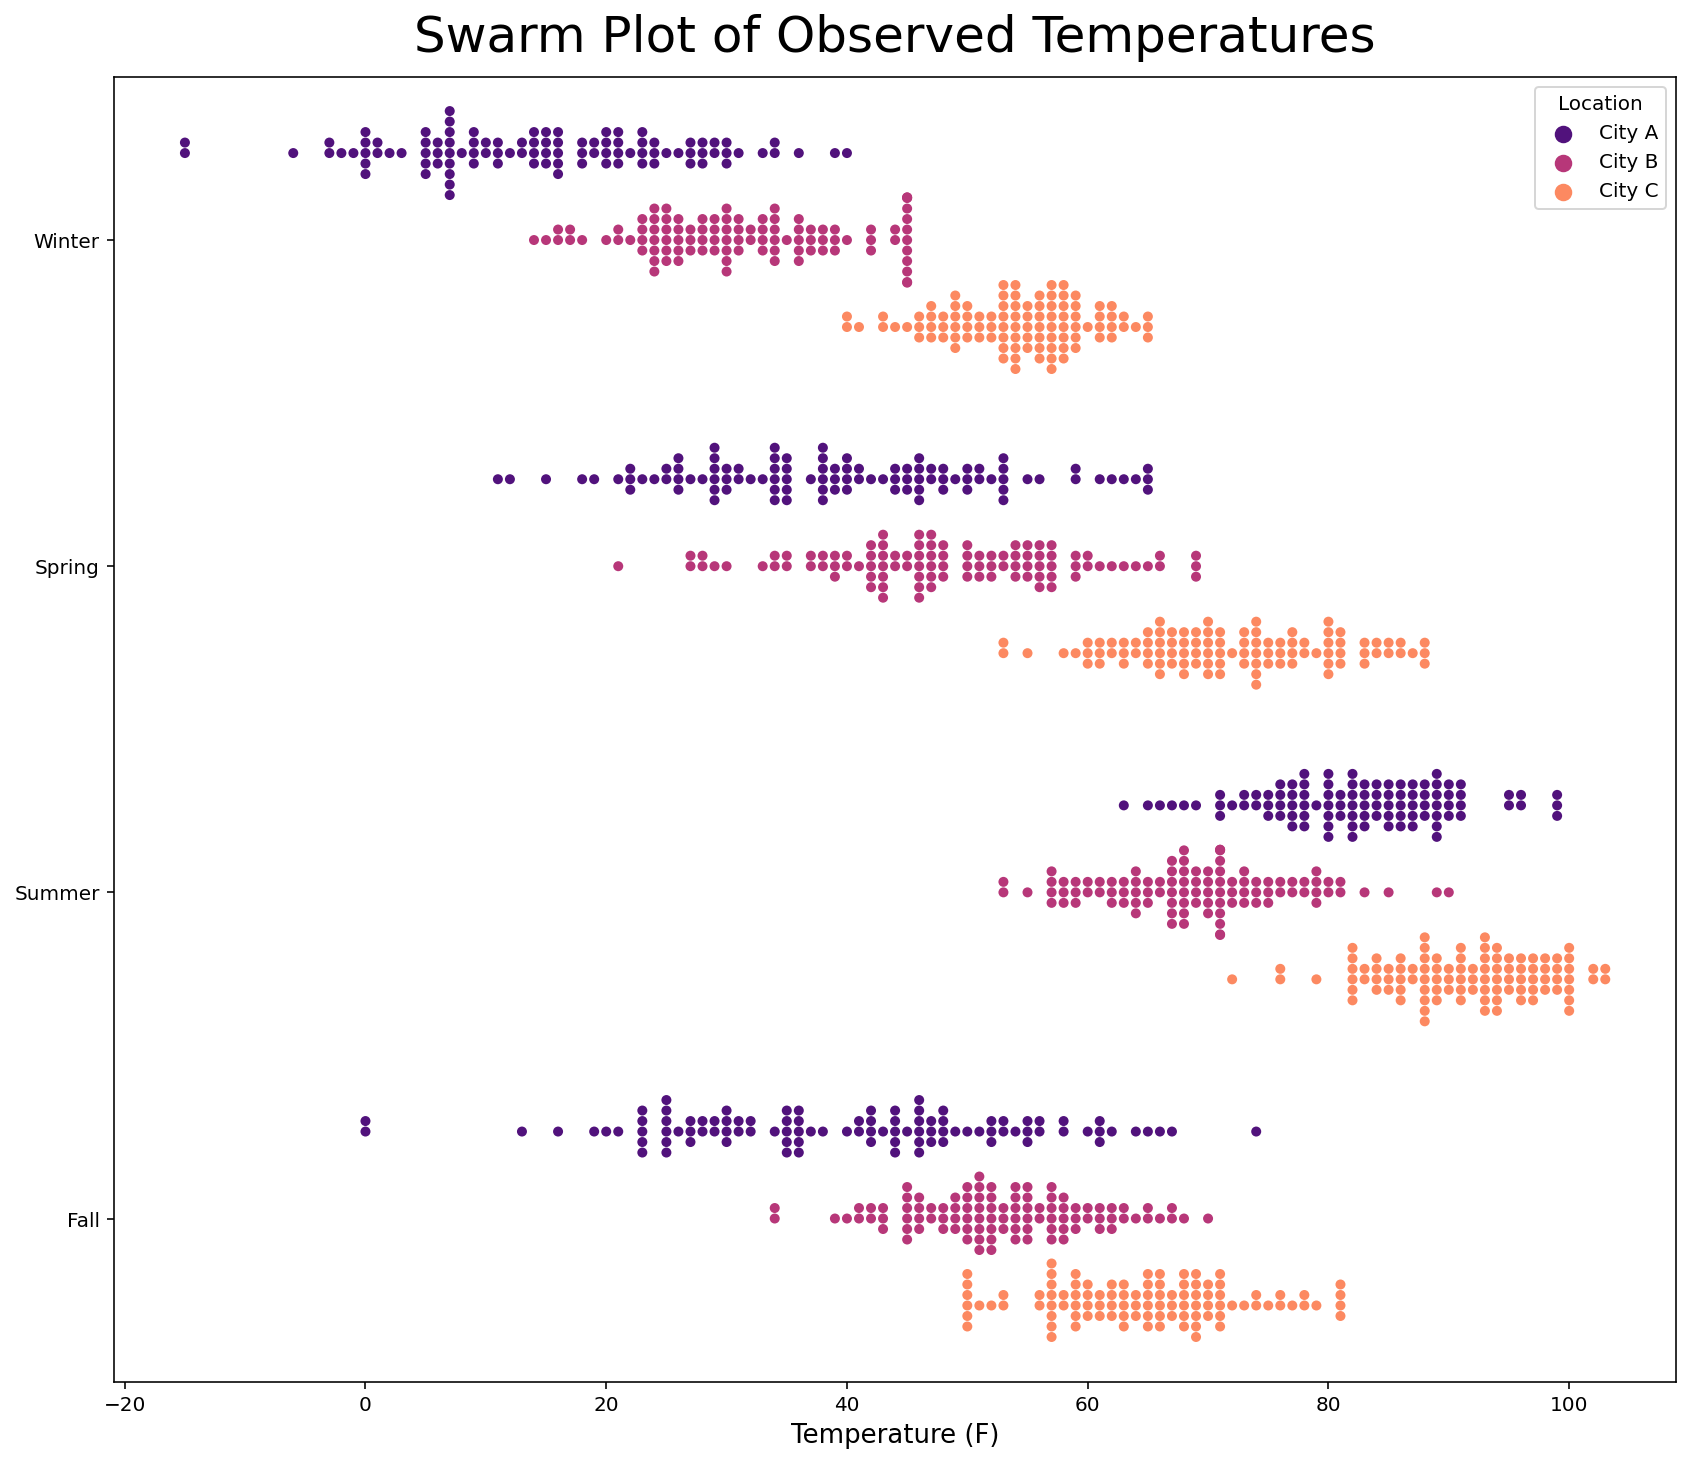

In [20]:
# Set plot size:
plt.figure(figsize=(14, 12))

# Generate strip plot:
sns.swarmplot(data=df, x='Temp', y='Season', hue='Location', 
              palette='magma', dodge=True)

# Set labels:
plt.title('Swarm Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

## Empirical Cumulative Distribution Function (ECDF)

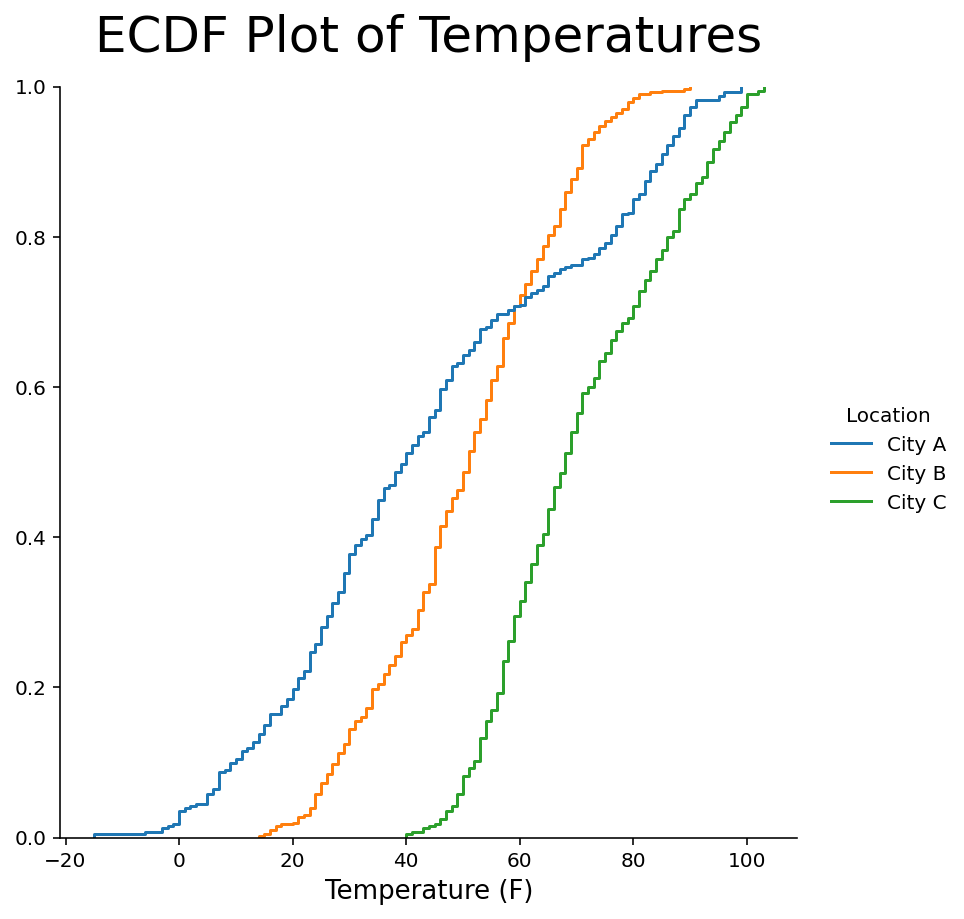

In [21]:
# Generate plot:
sns.displot(df, x='Temp', hue='Location', kind='ecdf', height=6)

# Set labels:
plt.title('ECDF Plot of Temperatures', fontsize=25, y=1.03)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

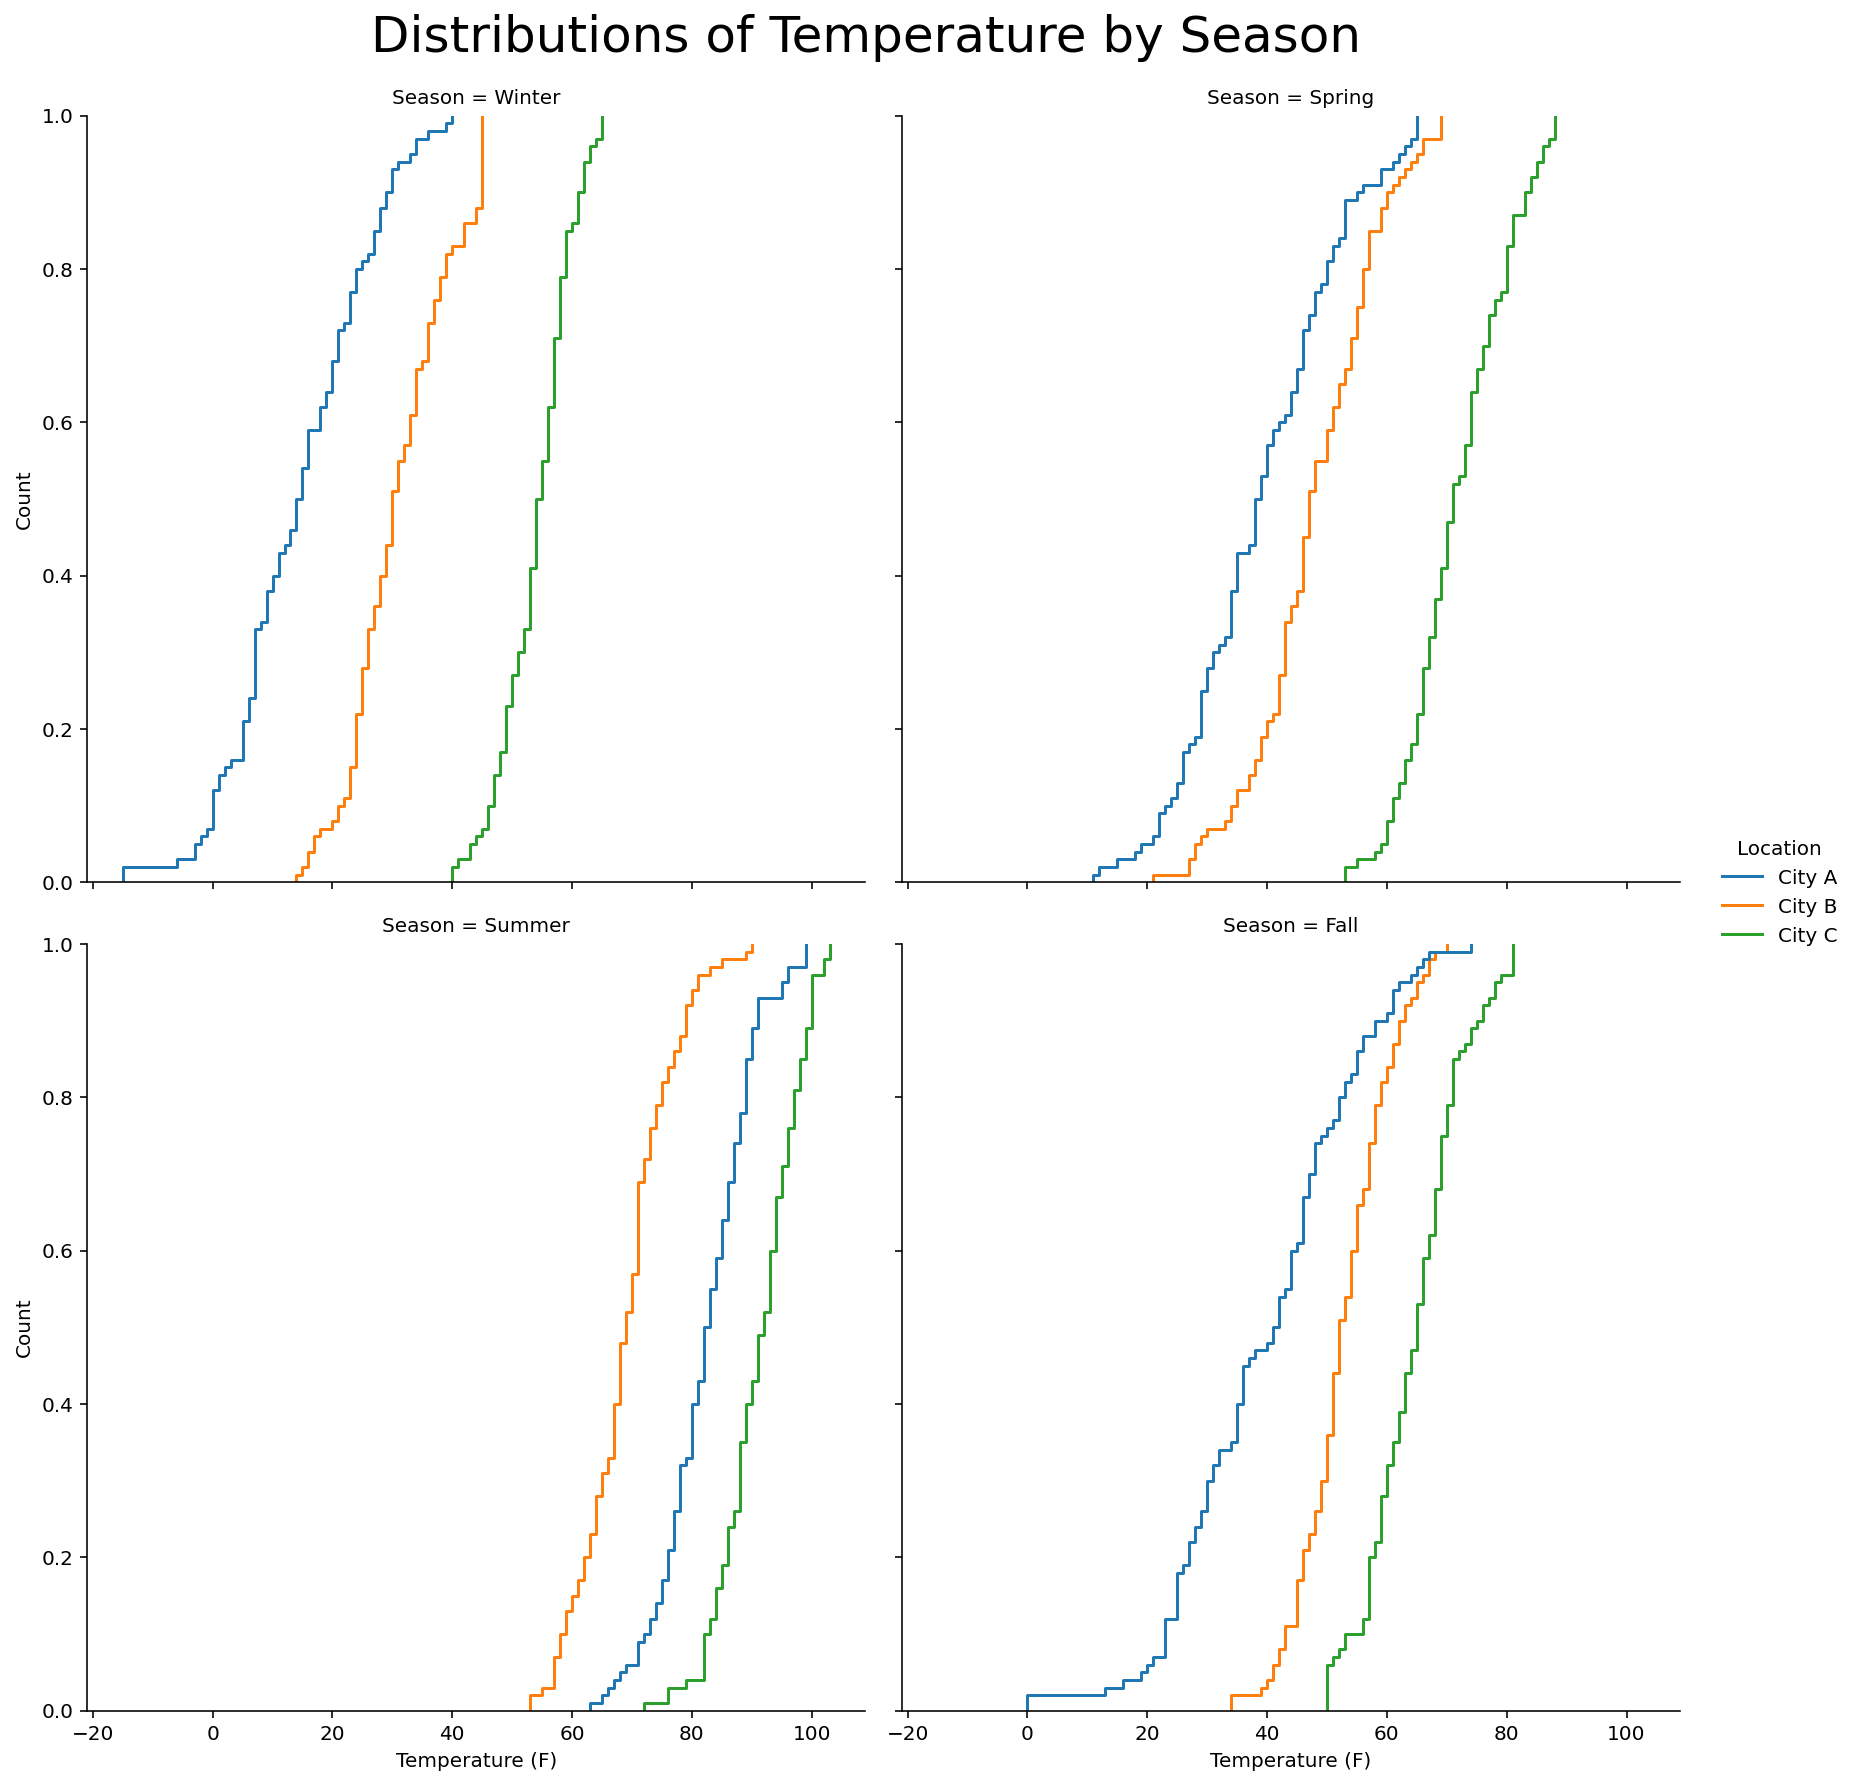

In [23]:
# Create Displot:
g = sns.displot(df, x='Temp', col='Season', hue='Location',
                kind='ecdf', height=6, col_wrap=2,
                facet_kws=dict(margin_titles=True))

# Set labels:
g.fig.suptitle('Distributions of Temperature by Season',
               fontsize=25, x=0.47, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Count');